# What is Finite Element Theory?

## Galerkin Methods

This is a bit of maths that shows you can legitimately model real world continuous problems as discrete, finite ones - and, even more, that, in certain ways, you can make it more accurate by making it bigger.

This turns it into a problem of lots (but finite quantities) of real numbers. Computers are perfect for these kind of problems.

![image1](https://i2.wp.com/fenicsproject.org/wp-content/uploads/2016/10/stokesexample.png?resize=768%2C359&ssl=1)

https://fenicsproject.org/

![image2](https://i0.wp.com/fenicsproject.org/wp-content/uploads/2017/10/tc_vm.png?resize=372%2C280)

https://fenicsproject.org/

![image3](http://cbc.simula.no/pub/cm/figs/twist.jpg)

http://cbc.simula.no/pub/cm/fenics.html

![image4](http://www.fenics-hpc.org/wp-content/uploads/2017/06/cropped-cropped-cyl_pylon_aoa22.56_trip_vortq01b.jpg)

http://www.fenics-hpc.org/

![image5](https://ecmiindmath.files.wordpress.com/2015/11/fenics-3.png?w=610)

https://fenicsproject.org/pub/graphics/fenics-poster-2015.pdf

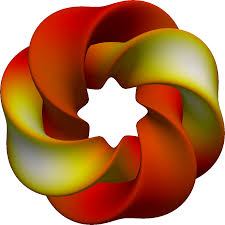

http://www.dolfin-adjoint.org/en/latest/documentation/klein/klein.html

![image6](https://ecmiindmath.files.wordpress.com/2015/11/fenics-2.png?w=610)

https://fenicsproject.org/pub/graphics/fenics-poster-2015.pdf

![image7](https://i2.wp.com/legato-team.eu/wp-content/uploads/2017/02/image_RF.png?resize=300%2C174)

![image8](https://i.ytimg.com/vi/TZtX2fDIsHo/maxresdefault.jpg)

https://www.youtube.com/watch?v=TZtX2fDIsHo

# Finite Element, Volume, Difference... Infinite Finites?

Finite element is the mathematician's approach. But that doesn't mean it's entirely bad.

![image9](https://lh3.googleusercontent.com/Yjwlav26_7a3pmhi6elB8PDLgwJgfNBwaGmttX8CA513HoySlY7hIqzbLm9qB3GGOTCkce3d7xPCciLLyCog=w1366-h635)

http://femtable.org/

No, please stay.

At a high level, if we have a continuous formula that applies over some domain, for example:
* Maxwell's equations around a coax cable
* Elasticity equations in a sheet of ice
* Navier-Stokes equations in a water pipe

Or, multiple equations linked together,
* potential flow and elasticity: hydroelasticity
* fluid flow and heat equation: re-entry
* magnetohydronamics: most existing equations rolled together for star mechanics and general masochism

Numerically, there are different ways of approaching each of these. For example, conventional wisdom says "Finite Volume" for fluids, "Finite Element" for solids. Historically, that was true. However, it turns out, with a modern approach, Finite Volume and Finite Difference are special cases of Finite Element.

That then means you need to pick the right finite element.

...but that involves a lot of maths, so just ask someone.

The most common finite elements are _Lagrange_ finite elements. They're also the most intuitive.

![lagrange-o1-1d](./triangle.svg)

This is a 2D, order 1 Lagrange finite element. Or, as it's also known, a triangle.

Essentially, you define a 2D function by making a patch-work of these over your domain(s) and assigning values at each corner of a triangle. So that tells you the value at a series of points - the value at any point inside a triangle (or on an edge) is based on the values at the corners like so: 

![linear-triangle](triangle-function.svg)

Put these together and require that overlapping corners on the neighbouring elements match, and you get a continuous, piecewise linear function:

![cont-lin-piecewise](triangle-tesselation.svg)

Different types of finite elements work in different ways. They may be different shapes, involve higher order polynomials instead of being linear (or more exotic things), they may specify derivatives, second derivatives, or vectors of function values.

However, each element (triangle) is defined now by the location of its corners, and the function values at each corner. Correspondingly our whole surface is defined by a finite set of numbers.

![approximation](triangle-approximation.svg)

That mesh of elements can also be made finer and finer, to better approximate any 2D function you want:

![fin-ele.png](approximation.png)

Putting all of those corner values, over all the mesh, into a single large vector, gives us a way of representing the whole function as a string of numbers, which a computer can process. Finite Element theory also gives us ways of turning differential operators into matrices, so we can approximate a partial differential equation (PDE) of continuous functions with a matrix problem.

$$ \begin{eqnarray}
\frac{d}{dt} \, f(x) &= 2 f(x) \\
\mathrm{approximated...} & \\
\frac{d}{dt} \tilde{f} &= 2 \tilde{f}(x) \,  \\
\implies M \, \bf{F} &= 2 \bf{F} \\
\textrm{Solve with a computer...} & \\
\bf{F} &= \begin{bmatrix} 1 \\ 3 \\ 5 \\ \vdots \\ \end{bmatrix} \\
\textrm{Gives} & \\
\tilde{f}(x) &= \textrm{FEalgorithm}(\bf{F}, x)
\end{eqnarray} $$

We can make $\tilde{f}$ a better and better approximation of $f$, but this normally involves making the matrix problem the computer solves bigger and bigger, so it's often a trade off of accuracy vs time.

## Variational Form

Finite element actually works by integration. To solve a differential problem, we solve a mathematically equivalent "variational problem". This is important because this is the actually maths that the computer will discretize, solve and present back to you.

Why? Because

1. a differential equation involves finding the slope of a function, and that doesn't really exist where the triangles in $\tilde{f}$ meet
2. we want to get an approximate solution, so we average error over an area (like a cell), rather than trying to get all points exact

However, I'm not going to dwell on that now, but it may help explain why the equations we enter are a bit different to the equations we ultimately want to solve.

For example, if we want to solve Poisson's equation (which comes up in electrostatics, and a few other places). It looks like (in 2D):

$$
\frac{d^2}{d x^2} f + \frac{d^2}{d y^2} f = g
$$

for some _known_ function $g$ and some _unknown_ function $f$.

To make it more intuitive, this is saying that the "divergence of $f$" is $g$, or that $g$ is the flux entering/leaving each point of $f$, or that where-ever $g$ is big, $f$ may have a pointy basin (to which things flood), and if it's very negative, $f$ may have a pointy peak (from which things leave). If you think about this for a while, you might realise that, if we are trying to define a function only by an equation of its derivatives, then we also need some more information...

These are boundary conditions. It turns out that, if we say $f$ is defined on a square, know it has (some vaguely believable) flux $g$ and we can say it's flat at the square's boundary (zero normal derivative), then we have a properly mathematically defined problem. We can find $f$.

This is exciting.

In [ ]:
from fenics import *

%matplotlib notebook

# Create mesh and define function space
mesh = UnitSquareMesh(3, 3)
V = FunctionSpace(mesh, "Lagrange", 1)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("sin(2 * pi * x[0]) + cos(2 * pi * x[1])", degree=1)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u)
plot(u)

u.rename("u", "Solution Variable")
outfile = File('u3.pvd')
outfile << u

Although, 2D is less fun than 3D...

In [ ]:
%matplotlib notebook

from fenics import *
from mshr import Sphere, generate_mesh

centre = Point(0.0, 0.0, 0.0)
sphere = Sphere(centre, 1)
mesh = generate_mesh(sphere, 10)
plot(mesh)

f = File("f.pvd")
f << mesh

In [ ]:
%matplotlib notebook

V = FunctionSpace(mesh, "Lagrange", 1)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(9.81)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

class SphereBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary
    
bc = DirichletBC(V, Constant(0.0), SphereBoundary())

# Compute solution
u = Function(V)

solve(a == L, u, bc)
u.rename("u", "Solution Variable")
outfile = File('u.pvd')
outfile << u
plot(u)

In [ ]:
# Credit: FEniCS Project official demos

from fenics import *

# Load mesh from file
mesh = Mesh("../demo/documented/navier-stokes/lshape.xml.gz")

# Define function spaces (P2-P1)
V = VectorFunctionSpace(mesh, "Lagrange", 2)
Q = FunctionSpace(mesh, "Lagrange", 1)

# Define trial and test functions
u = TrialFunction(V)
p = TrialFunction(Q)
v = TestFunction(V)
q = TestFunction(Q)

# Set parameter values
dt = 0.01
T = 3
nu = 0.01

# Define time-dependent pressure boundary condition
p_in = Expression("sin(3.0*t)", t=0.0, degree=1)

# Define boundary conditions
noslip  = DirichletBC(V, (0, 0),
                      "on_boundary && \
                       (x[0] < DOLFIN_EPS | x[1] < DOLFIN_EPS | \
                       (x[0] > 0.5 - DOLFIN_EPS && x[1] > 0.5 - DOLFIN_EPS))")
inflow  = DirichletBC(Q, p_in, "x[1] > 1.0 - DOLFIN_EPS")
outflow = DirichletBC(Q, 0, "x[0] > 1.0 - DOLFIN_EPS")
bcu = [noslip]
bcp = [inflow, outflow]

# Create functions
u0 = Function(V)
u1 = Function(V)
p1 = Function(Q)

# Define coefficients
k = Constant(dt)
f = Constant((0, 0))

# Tentative velocity step
F1 = (1/k)*inner(u - u0, v)*dx + inner(grad(u0)*u0, v)*dx + \
     nu*inner(grad(u), grad(v))*dx - inner(f, v)*dx
a1 = lhs(F1)
L1 = rhs(F1)

# Pressure update
a2 = inner(grad(p), grad(q))*dx
L2 = -(1/k)*div(u1)*q*dx

# Velocity update
a3 = inner(u, v)*dx
L3 = inner(u1, v)*dx - k*inner(grad(p1), v)*dx

# Assemble matrices
A1 = assemble(a1)
A2 = assemble(a2)
A3 = assemble(a3)

# Use amg preconditioner if available
prec = "amg" if has_krylov_solver_preconditioner("amg") else "default"

# Use nonzero guesses - essential for CG with non-symmetric BC
parameters['krylov_solver']['nonzero_initial_guess'] = True

# Create files for storing solution
ufile = File("results/velocity.pvd")
pfile = File("results/pressure.pvd")

# Time-stepping
t = dt
while t < T + DOLFIN_EPS:

    # Update pressure boundary condition
    p_in.t = t

    # Compute tentative velocity step
    begin("Computing tentative velocity")
    b1 = assemble(L1)
    [bc.apply(A1, b1) for bc in bcu]
    solve(A1, u1.vector(), b1, "bicgstab", "default")
    end()

    # Pressure correction
    begin("Computing pressure correction")
    b2 = assemble(L2)
    [bc.apply(A2, b2) for bc in bcp]
    [bc.apply(p1.vector()) for bc in bcp]
    solve(A2, p1.vector(), b2, "bicgstab", prec)
    end()

    # Velocity correction
    begin("Computing velocity correction")
    b3 = assemble(L3)
    [bc.apply(A3, b3) for bc in bcu]
    solve(A3, u1.vector(), b3, "bicgstab", "default")
    end()

    # Plot solution
    # plot(p1, title="Pressure", rescale=True)
    # plot(u1, title="Velocity", rescale=True)

    # Save to file
    ufile << u1
    pfile << p1

    # Move to next time step
    u0.assign(u1)
    t += dt
    print("t =", t)


While this may seem long, it's because this contains _everything_ specific to the physics. The best comparison with other tools, is looking at the source files for the FE tool's Navier-Stokes solver: here's Elmer's closest equivalent at 1652 lines... https://raw.githubusercontent.com/tehnick/elmerfem/master/fem/src/NavierStokes.src

FEniCS is able to bundle all the physics into a couple dozen lines (and Navier-Stokes is definitely at the complex end), because it has a deep understanding of the mathematical theory - this allows it provide just as much abstraction needed to be generic, but no more.

## Isn't this way more complicated?

Not necessarily - firstly this is doing something different to the traditional approach (e.g. Elmer, COMSOL, Abaqus...), where the software recognises the general type of equation and picks a standard set of configurations, including elements, to solve it (potentially with some parameters). NASTRAN, PATRAN (engineering industry standard) let you pick an element, but don't really give you enough information about it... (apparently the numerics you're using are their trade secret)

Getting the settings wrong can lead to unexpected problems...

![tricell](tricell.svg)

![sleipner](http://www-users.math.umn.edu/~arnold/disasters/sleipner.gif)

http://www-users.math.umn.edu/~arnold/disasters/sleipner.html

This is why having access to the actual code, even if you need to get help reading it, can avoid months of battling configuration, undiagnosable weird numerical problems, or expensive fees to licensed consultants, or worse (^^^), when the answer is in the maths on your laptop.

ALSO

https://www.comsol.com/model/microwave-heating-of-a-cancer-tumor-30

Having researched this (and built a comparable model in FEniCS), the research papers which used this often got the maths completely wrong, or misread the manual and copied the text in a nonsensical way... not ideal for reproducability... which meant cross-correlating half-a-dozen papers to understand the physics, and separate out the mistakes. However, our FEniCS and Elmer models were able to reproduce COMSOL results, and the process highlighted where the limitations were, and the things COMSOL had left out of the manual...

## How do I get a black box?

The power of Python...

In [ ]:
# Turn an official demo into a solver
def solve_navier_stokes(mesh, bcu, bcp, dt, T, nu, ufile, pfile):
    # Define function spaces (P2-P1)
    V = VectorFunctionSpace(mesh, "Lagrange", 2)
    Q = FunctionSpace(mesh, "Lagrange", 1)

    # Define trial and test functions
    u = TrialFunction(V)
    p = TrialFunction(Q)
    v = TestFunction(V)
    q = TestFunction(Q)

    # Define time-dependent pressure boundary condition
    p_in = Expression("sin(3.0*t)", t=0.0, degree=1)


    # Create functions
    u0 = Function(V)
    u1 = Function(V)
    p1 = Function(Q)

    # Define coefficients
    k = Constant(dt)
    f = Constant((0, 0))

    # Tentative velocity step
    F1 = (1/k)*inner(u - u0, v)*dx + inner(grad(u0)*u0, v)*dx + \
         nu*inner(grad(u), grad(v))*dx - inner(f, v)*dx
    a1 = lhs(F1)
    L1 = rhs(F1)

    # Pressure update
    a2 = inner(grad(p), grad(q))*dx
    L2 = -(1/k)*div(u1)*q*dx

    # Velocity update
    a3 = inner(u, v)*dx
    L3 = inner(u1, v)*dx - k*inner(grad(p1), v)*dx

    # Assemble matrices
    A1 = assemble(a1)
    A2 = assemble(a2)
    A3 = assemble(a3)

    # Use amg preconditioner if available
    prec = "amg" if has_krylov_solver_preconditioner("amg") else "default"

    # Use nonzero guesses - essential for CG with non-symmetric BC
    parameters['krylov_solver']['nonzero_initial_guess'] = True

    # Time-stepping
    t = dt
    while t < T + DOLFIN_EPS:

        # Update pressure boundary condition
        p_in.t = t

        # Compute tentative velocity step
        begin("Computing tentative velocity")
        b1 = assemble(L1)
        [bc.apply(A1, b1) for bc in bcu]
        solve(A1, u1.vector(), b1, "bicgstab", "default")
        end()

        # Pressure correction
        begin("Computing pressure correction")
        b2 = assemble(L2)
        [bc.apply(A2, b2) for bc in bcp]
        [bc.apply(p1.vector()) for bc in bcp]
        solve(A2, p1.vector(), b2, "bicgstab", prec)
        end()

        # Velocity correction
        begin("Computing velocity correction")
        b3 = assemble(L3)
        [bc.apply(A3, b3) for bc in bcu]
        solve(A3, u1.vector(), b3, "bicgstab", "default")
        end()

        # Save to file
        ufile << u1
        pfile << p1

        # Move to next time step
        u0.assign(u1)
        t += dt
        print("t =", t)

In real-life we would normally have the above solver in one Python file, and then be able to run the code below in a much shorter, tidier, less confusing script:

In [ ]:
# This is now my Python script

# Load mesh from file
mesh = Mesh("../demo/documented/navier-stokes/lshape.xml.gz")

# Set parameter values
dt = 0.01
T = 3
nu = 0.01

# Create files for storing solution
ufile = File("results/velocity.pvd")
pfile = File("results/pressure.pvd")


# Define boundary conditions
noslip  = DirichletBC(V, (0, 0),
                      "on_boundary && \
                       (x[0] < DOLFIN_EPS | x[1] < DOLFIN_EPS | \
                       (x[0] > 0.5 - DOLFIN_EPS && x[1] > 0.5 - DOLFIN_EPS))")
inflow  = DirichletBC(Q, p_in, "x[1] > 1.0 - DOLFIN_EPS")
outflow = DirichletBC(Q, 0, "x[0] > 1.0 - DOLFIN_EPS")
bcu = [noslip]
bcp = [inflow, outflow]

solve_navier_stokes(mesh, bcu, bcp, dt, T, nu, ufile, pfile)

In [ ]:
# FEniCS demos...

import os

demos = os.listdir('../demo/documented') + os.listdir('../demo/undocumented')
from IPython.display import display, Markdown
display(Markdown('* ' + '\n* '.join(demos)))

Find Python code [here](/tree/demo) and explanatory documentation [here](https://fenics.readthedocs.io/projects/dolfin/en/stable/demos.html)

The documented demos provide a walk-through of the finite element theory showing that the solver is mathematically sensible, and why it is the way it is.

## Next Time

* Which solvers/physics?
* When?
* Any questions for devs?
* Using a development environment
* Take a look at Garth Well's materials on Microsoft Azure

# Challenge

In remaining time, create a new notebook and try to get one of the demos to run.

## Stretch Goal

If you get that working and are feeling adventurous, make a function, like the black box Navier-Stokes approach above, so you can pass any desired parameters as arguments, e.g.

In [ ]:
%matplotlib notebook

from fenics import *

param1 = 2.3
param2 = 84.1
bc = DirichetBC(...)
mesh = Mesh('....') # or maybe a sphere, box, etc.
outfile = File('outvar.pvd')

solve_blackboxphysics(param1, param2, bc, outfile)